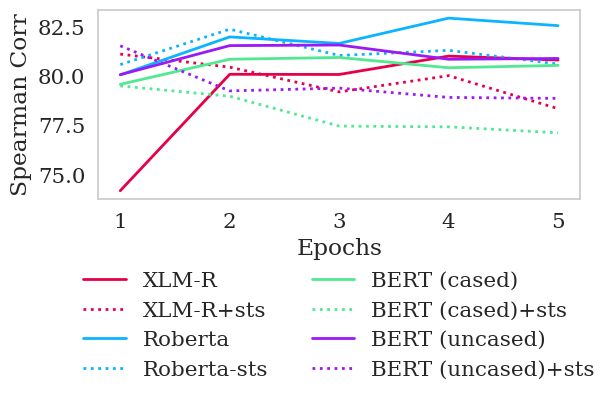

In [2]:
import sys
sys.path.append('..')
from src.util import palette
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = [
    palette[0], palette[0],
    palette[1], palette[1],
    palette[2], palette[2],
    palette[3], palette[3],
    palette[4], palette[4],
]
sns.set_theme(font="Serif", style="whitegrid", font_scale=1.4)
sns.set_palette(sns.color_palette(colors))

data = {
    "XLM-R": [74.20, 80.09, 80.08, 81.01, 80.81],
    "XLM-R+sts": [81.11, 80.45, 79.20, 80.02, 78.35],
    "Roberta": [80.06, 81.98, 81.65, 82.93, 82.55],
    "Roberta-sts": [80.58, 82.37, 81.04, 81.30, 80.61],
    "BERT (cased)": [79.58, 80.85, 80.94, 80.42, 80.54],
    "BERT (cased)+sts": [79.50, 78.98, 77.47, 77.43, 77.13],
    "BERT (uncased)": [80.07, 81.54, 81.57, 80.85, 80.89],
    "BERT (uncased)+sts": [81.53, 79.25, 79.39, 78.92, 78.87],
}

epochs = np.arange(1, len(data["XLM-R"])+1)

plt.figure(figsize=(6, 3))
for model, spearman_c in data.items():
    linestyle = 'solid' if 'sts' not in model else 'dotted'
    plt.plot(epochs, spearman_c, label=model, linestyle=linestyle, linewidth=2)
# remove all grid lines
plt.grid(False)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Spearman Corr")
plt.tight_layout()
legend_properties = {}
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -1.05), frameon=False, prop=legend_properties)
    
plt.savefig("figures/english_models_dev_sts.pdf", format="pdf", bbox_inches="tight")
plt.show()